In [1]:
#!/usr/bin/env python3.6
# -*- coding: utf-8 -*-

In [2]:
# Imports
import sys
import joblib
import numpy as np
from math import atan2
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [3]:
#np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [4]:
%matplotlib inline

In [5]:
%store -r X_motion_CoM_continuous
%store -r Y_motion_CoM_continuous
print(X_motion_CoM_continuous.shape)
print(Y_motion_CoM_continuous.shape)

(762, 35)
(762, 3)


In [6]:
X_motion_CoM_continuous[0]

array([ 1.00000000e-01,  0.00000000e+00,  0.00000000e+00,  2.76536650e-01,
        7.39996437e-02, -8.95589104e-05,  2.71097532e-01, -1.85977030e-01,
       -8.20218458e-05, -2.41889960e-01,  8.34464317e-02, -3.18781727e-05,
       -2.47859007e-01, -1.72227936e-01, -2.83496783e-05,  3.62276151e-02,
       -5.00990726e-02,  3.77566304e-01, -3.20772482e-04, -3.22219959e-04,
       -1.09502904e-02,  9.99939940e-01,  1.48401986e-04,  1.68948026e-02,
       -1.10034712e-02, -6.04931960e-04,  1.55107237e-02,  9.33398822e-03,
                   nan,             nan,  1.00000000e-01,  0.00000000e+00,
        0.00000000e+00,  1.00000000e+00,  0.00000000e+00])

# Multivariate Linear Regression (Foot prediction)

In [7]:
import sklearn
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [8]:
# Entries where FL foot is swinging
idx_fl_rr_swinging = np.where(X_motion_CoM_continuous[:, -2] == 0)[0]
X_motion_CoM_continuous_FL_RR = X_motion_CoM_continuous[idx_fl_rr_swinging]
Y_motion_CoM_continuous_FL_RR = Y_motion_CoM_continuous[idx_fl_rr_swinging]

In [9]:
idx_fl_rr_swinging.shape

(381,)

## Predict CoM -> x

In [10]:
X_motion_CoM_continuous_FL_RR[0, :]

array([ 1.00000000e-01,  0.00000000e+00,  0.00000000e+00,  2.77463022e-01,
        7.41936085e-02, -7.04082187e-05,  2.95483763e-01, -1.78876173e-01,
       -1.38556324e-04, -2.14395383e-01,  9.07057051e-02, -6.77437944e-05,
       -2.46856504e-01, -1.72011184e-01, -1.79759025e-06,  4.88415801e-02,
       -4.74314535e-02,  3.79038358e-01,  1.56271751e-03, -8.47146945e-04,
       -1.13983225e-02,  9.99933457e-01,  8.09653828e-02, -2.02463898e-03,
        1.59138117e-03, -1.23841927e-01,  3.95024138e-02, -7.59827570e-04,
                   nan,             nan,  1.00000000e-01,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.00000000e+00])

In [11]:
Y_motion_CoM_continuous_FL_RR[0, :]

array([0.018571  , 0.00070724, 0.00077114])

### Linear Regression

In [12]:
# Input
X = np.hstack((X_motion_CoM_continuous_FL_RR[:, :3], # motion command
               X_motion_CoM_continuous_FL_RR[:, 3:9],
               X_motion_CoM_continuous_FL_RR[:, 9:11], # FL (x,y) position
               X_motion_CoM_continuous_FL_RR[:, 12:14], # FR (x,y) position
               X_motion_CoM_continuous_FL_RR[:, 15:17], # RL (x,y) position
               X_motion_CoM_continuous_FL_RR[:, 18:20]))

# Labels
Y = np.array([Y_motion_CoM_continuous_FL_RR[:, 0]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True, random_state=100)

# Create the model
model_fl_com_x = LinearRegression()

# Fit the model
model_fl_com_x.fit(X_train, Y_train)

# Predict
predictions = model_fl_com_x.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.9899118579662837
RMSE:  0.0037529534657218594
The lowest error is:  3.324413504791901e-05
The highest error is:  0.01221940557809914
The avg. error is:  0.002750942507570056


In [13]:
model_fl_com_x.coef_

array([[ 2.45997569e-01, -1.04659738e-12,  5.79258863e-14,
         2.62299073e-01,  9.51598062e-01,  7.61253049e+00,
        -4.69443326e-02, -5.54930950e-01,  1.63183970e+00,
         5.03807949e-01, -2.14029290e-01,  2.04155767e-01,
         4.19125425e-01, -9.23187186e-01, -5.96078730e-01,
        -4.39463923e-03, -2.36028427e-01]])

In [14]:
model_fl_com_x.intercept_

array([0.03125234])

Text(0, 0.5, 'Predictions')

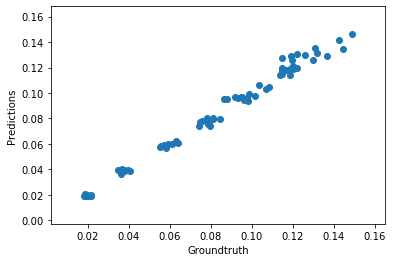

In [15]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Groundtruth")
plt.ylabel("Predictions")

In [16]:
#%store model_fl_com_x

In [17]:
#for idx, prediction in enumerate(predictions):
#    print(f'Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [18]:
# Save model
#joblib.dump(model_fl_com_x, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/model_fl_com_x.sav")

## Predict CoM foot -> y

### Linear Regression

In [19]:
# Input
X = np.hstack((X_motion_CoM_continuous_FL_RR[:, :3], # motion command
               X_motion_CoM_continuous_FL_RR[:, 3:9],
               X_motion_CoM_continuous_FL_RR[:, 9:11], # FL (x,y) position
               X_motion_CoM_continuous_FL_RR[:, 12:14], # FR (x,y) position
               X_motion_CoM_continuous_FL_RR[:, 15:17], # RL (x,y) position
               X_motion_CoM_continuous_FL_RR[:, 18:20])) 

# Labels
Y = np.array([Y_motion_CoM_continuous_FL_RR[:, 1]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True, random_state=100)

# Create the model
model_fl_com_y = LinearRegression()

# Fit the model
model_fl_com_y.fit(X_train, Y_train)

# Predict
predictions = model_fl_com_y.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.9082327729962391
RMSE:  0.00047272422780120205
The lowest error is:  1.0025070276106426e-05
The highest error is:  0.0013879408344654107
The avg. error is:  0.0003559952128649995


In [20]:
model_fl_com_y.coef_

array([[ 1.51609682e-02,  2.40422428e-13, -1.39679934e-14,
         2.39453358e-02, -2.27468766e-03, -1.82294736e+00,
        -4.15679749e-02, -1.41957997e-01, -2.24011318e-01,
        -2.99572356e-02, -1.13310450e-01,  6.91970077e-02,
        -7.08503375e-03, -2.15001404e-02,  2.70973357e-01,
        -3.64473894e-02, -3.14972681e-02]])

In [21]:
model_fl_com_y.intercept_

array([0.011811])

Text(0, 0.5, 'Predictions')

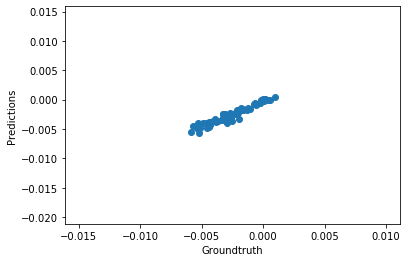

In [22]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Groundtruth")
plt.ylabel("Predictions")

In [27]:
#%store model_fl_com_y

In [28]:
#for idx, prediction in enumerate(predictions):
#    print(f'Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [29]:
# Save model
#joblib.dump(model_fl_com_y, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/model_fl_com_y.sav")

## Predict CoM -> Yaw

In [23]:
# Input
X = np.hstack((X_motion_CoM_continuous_FL_RR[:, :3], # motion command
               X_motion_CoM_continuous_FL_RR[:, 3:9],
               X_motion_CoM_continuous_FL_RR[:, 9:11], # FL (x,y) position
               X_motion_CoM_continuous_FL_RR[:, 12:14], # FR (x,y) position
               X_motion_CoM_continuous_FL_RR[:, 15:17], # RL (x,y) position
               X_motion_CoM_continuous_FL_RR[:, 18:20])) 

# Labels
Y = np.array([Y_motion_CoM_continuous_FL_RR[:, 2]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True, random_state=100)

# Create the model
model_fl_com_theta = LinearRegression()

# Fit the model
model_fl_com_theta.fit(X_train, Y_train)

# Predict
predictions = model_fl_com_theta.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.7879556097489941
RMSE:  0.0004185740305475557
The lowest error is:  2.38138475494587e-07
The highest error is:  0.0012874763909512428
The avg. error is:  0.00031233493970336205


In [24]:
model_fl_com_theta.coef_

array([[ 5.59168392e-04, -3.72404944e-13,  2.12217396e-14,
         7.59861784e-03,  2.07320842e-02,  2.81971926e+00,
        -6.63353496e-02, -1.74550784e-02,  3.35600640e-01,
         5.85396997e-02, -2.69102804e-02,  2.91443282e-03,
         2.76603503e-02, -2.73609078e-03, -5.03641281e-03,
         1.36821794e-02, -2.68983727e-02]])

In [25]:
model_fl_com_theta.intercept_

array([0.03397652])

Text(0, 0.5, 'Predictions')

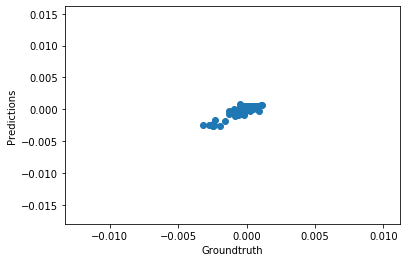

In [33]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Groundtruth")
plt.ylabel("Predictions")